In [157]:
#We import the libraries used on this case
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
# We load the Cash Request csv and Fees csv
cash = pd.read_csv('project_dataset/cash-clean.csv')
fees = pd.read_csv('project_dataset/fees-clean.csv')

In [159]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  23970 non-null  int64  
 1   id                          23970 non-null  int64  
 2   amount                      23970 non-null  float64
 3   status                      23970 non-null  object 
 4   created_at                  23970 non-null  object 
 5   updated_at                  23970 non-null  object 
 6   user_id                     23970 non-null  float64
 7   moderated_at                16035 non-null  object 
 8   deleted_account_id          2104 non-null   float64
 9   reimbursement_date          23970 non-null  object 
 10  cash_request_received_date  16289 non-null  object 
 11  money_back_date             16543 non-null  object 
 12  transfer_type               23970 non-null  object 
 13  send_at                     166

In [160]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21057 non-null  int64  
 1   id               21057 non-null  int64  
 2   cash_request_id  21057 non-null  float64
 3   type             21057 non-null  object 
 4   status           21057 non-null  object 
 5   category         2196 non-null   object 
 6   total_amount     21057 non-null  float64
 7   reason           21057 non-null  object 
 8   created_at       21057 non-null  object 
 9   updated_at       21057 non-null  object 
 10  paid_at          15531 non-null  object 
 11  from_date        7766 non-null   object 
 12  to_date          7766 non-null   object 
 13  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.2+ MB


In [161]:
cash.head()

,Unnamed: 0,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00:00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.347780+00:00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00:00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00:00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00:00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [162]:
#We start with the analysis, our goal is try to show how much benefits Ironhack earn. So first, we merge the datasets using the cash_id as the key from each dataset.
merged_df = pd.merge(cash, fees, left_on='id', right_on='cash_request_id', suffixes=('_cash','_fee'))
merged_df

,Unnamed: 0_cash,id_cash,amount,status_cash,created_at_cash,updated_at_cash,user_id,moderated_at,deleted_account_id,reimbursement_date,...,status_fee,category,total_amount,reason,created_at_fee,updated_at_fee,paid_at,from_date,to_date,charge_moment
0,48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00:00,...,accepted,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after
1,88,2203,100.0,money_back,2020-05-27 02:26:27.615190+00:00,2020-06-09 11:25:51.72636+00,2109.0,2020-05-27 10:02:13.094467+00,NaN,2020-07-15 02:26:27+00:00,...,accepted,NaN,5.0,Postpone Cash Request 2203,2020-06-09 11:25:52.449808+00,2020-10-13 14:25:00.867548+00,NaN,2020-06-15 02:26:27+00,2020-07-15 02:26:27+00,before
2,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
3,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
4,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00:00,...,accepted,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after
21053,23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00:00,...,accepted,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before
21054,23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00:00,...,accepted,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after
21055,23969,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00:00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00:00,...,accepted,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before


In [163]:
#We created a new df with the necessary column for the analysis
df_analysis = merged_df[['id_cash','created_at_cash','amount','total_amount','money_back_date','paid_at','status_cash','status_fee','from_date','user_id']]
df_analysis

,id_cash,created_at_cash,amount,total_amount,money_back_date,paid_at,status_cash,status_fee,from_date,user_id
0,23534,2020-10-23 15:20:26.163927+00:00,25.0,5.0,2020-11-06 07:16:21.845479+00,2020-11-06 07:16:22.014422+00,money_back,accepted,NaN,21465.0
1,2203,2020-05-27 02:26:27.615190+00:00,100.0,5.0,2020-07-15 22:00:00+00,NaN,money_back,accepted,2020-06-15 02:26:27+00,2109.0
2,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0
3,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0
4,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0
...,...,...,...,...,...,...,...,...,...,...
21052,22357,2020-10-20 07:58:04.006937+00:00,100.0,5.0,2021-02-05 12:19:30.626289+00,2021-02-05 12:19:30.685779+00,money_back,accepted,NaN,82122.0
21053,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2020-10-30 17:08:21.416796+00,money_back,accepted,2020-11-06 11:00:00+00,64517.0
21054,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2021-02-05 13:14:19.731397+00,money_back,accepted,NaN,64517.0
21055,19886,2020-10-08 14:16:52.155661+00:00,100.0,5.0,NaN,2020-10-10 21:22:04.456828+00,direct_debit_sent,accepted,2020-11-06 22:00:00+00,44867.0


In [164]:
#We transform the date to a datetime object
df_analysis['created_at_cash'] = pd.to_datetime(df_analysis['created_at_cash'])
#And we created the cohorts as a new column. The cohort is made by the first cash request in the platform, only getting the year-month
df_analysis['cohort group'] = df_analysis.groupby('user_id')['created_at_cash'].transform('min').dt.to_period('M')
df_analysis

C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\4150191031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['created_at_cash'] = pd.to_datetime(df_analysis['created_at_cash'])
C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\4150191031.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_analysis['cohort group'] = df_analysis.groupby('user_id')['created_at_cash'].transform('min').dt.to_period('M')
C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\4150191031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,id_cash,created_at_cash,amount,total_amount,money_back_date,paid_at,status_cash,status_fee,from_date,user_id,cohort group
0,23534,2020-10-23 15:20:26.163927+00:00,25.0,5.0,2020-11-06 07:16:21.845479+00,2020-11-06 07:16:22.014422+00,money_back,accepted,NaN,21465.0,2020-10
1,2203,2020-05-27 02:26:27.615190+00:00,100.0,5.0,2020-07-15 22:00:00+00,NaN,money_back,accepted,2020-06-15 02:26:27+00,2109.0,2020-05
2,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07
3,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07
4,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07
...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,2020-10-20 07:58:04.006937+00:00,100.0,5.0,2021-02-05 12:19:30.626289+00,2021-02-05 12:19:30.685779+00,money_back,accepted,NaN,82122.0,2020-10
21053,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2020-10-30 17:08:21.416796+00,money_back,accepted,2020-11-06 11:00:00+00,64517.0,2020-10
21054,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2021-02-05 13:14:19.731397+00,money_back,accepted,NaN,64517.0,2020-10
21055,19886,2020-10-08 14:16:52.155661+00:00,100.0,5.0,NaN,2020-10-10 21:22:04.456828+00,direct_debit_sent,accepted,2020-11-06 22:00:00+00,44867.0,2020-10


In [165]:
#We create another column called benefits, that is the same as total_amount. Our definition of benefit in this case is the fees that the platform add to a cash request.
df_analysis['benefits'] = df_analysis['total_amount']
df_analysis

C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\3867224922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['benefits'] = df_analysis['total_amount']


,id_cash,created_at_cash,amount,total_amount,money_back_date,paid_at,status_cash,status_fee,from_date,user_id,cohort group,benefits
0,23534,2020-10-23 15:20:26.163927+00:00,25.0,5.0,2020-11-06 07:16:21.845479+00,2020-11-06 07:16:22.014422+00,money_back,accepted,NaN,21465.0,2020-10,5.0
1,2203,2020-05-27 02:26:27.615190+00:00,100.0,5.0,2020-07-15 22:00:00+00,NaN,money_back,accepted,2020-06-15 02:26:27+00,2109.0,2020-05,5.0
2,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07,5.0
3,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07,5.0
4,6098,2020-07-01 09:30:03.145410+00:00,100.0,5.0,NaN,NaN,active,cancelled,2020-08-03 22:00:00+00,23328.0,2020-07,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,2020-10-20 07:58:04.006937+00:00,100.0,5.0,2021-02-05 12:19:30.626289+00,2021-02-05 12:19:30.685779+00,money_back,accepted,NaN,82122.0,2020-10,5.0
21053,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2020-10-30 17:08:21.416796+00,money_back,accepted,2020-11-06 11:00:00+00,64517.0,2020-10,5.0
21054,20256,2020-10-10 05:40:55.700422+00:00,100.0,5.0,2021-02-05 13:14:19.689906+00,2021-02-05 13:14:19.731397+00,money_back,accepted,NaN,64517.0,2020-10,5.0
21055,19886,2020-10-08 14:16:52.155661+00:00,100.0,5.0,NaN,2020-10-10 21:22:04.456828+00,direct_debit_sent,accepted,2020-11-06 22:00:00+00,44867.0,2020-10,5.0


In [166]:
#Once we have the benefits column and the cohort group, we make another group by using cohort_group and created_cash (used for the pivot table), to take the benefits for each cohort
df_analysis['created_at_cash'] = pd.to_datetime(df_analysis['created_at_cash']).dt.to_period('M')
suma_por_cash_id_y_cohort = df_analysis.groupby(['cohort group','created_at_cash'])['benefits'].sum().reset_index()
sum_benefits = suma_por_cash_id_y_cohort['benefits'].sum()
print(sum_benefits)
suma_por_cash_id_y_cohort

105290.0


C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\2177412127.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_analysis['created_at_cash'] = pd.to_datetime(df_analysis['created_at_cash']).dt.to_period('M')
C:\Users\rferr\AppData\Local\Temp\ipykernel_6048\2177412127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['created_at_cash'] = pd.to_datetime(df_analysis['created_at_cash']).dt.to_period('M')


,cohort group,created_at_cash,benefits
0,2020-04,2020-04,5.0
1,2020-04,2020-06,20.0
2,2020-05,2020-05,1285.0
3,2020-05,2020-06,205.0
4,2020-05,2020-07,305.0
5,2020-05,2020-08,440.0
6,2020-05,2020-09,185.0
7,2020-05,2020-10,290.0
8,2020-05,2020-11,5.0
9,2020-06,2020-06,8500.0


In [167]:
#We make our pivot table to check the evolution of each cohort
pivot = suma_por_cash_id_y_cohort.pivot(index='cohort group', columns='created_at_cash', values='benefits')
pivot

created_at_cash,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort group,,,,,,,,
2020-04,5.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2020-05,NaN,1285.0,205.0,305.0,440.0,185.0,290.0,5.0
2020-06,NaN,NaN,8500.0,1425.0,3095.0,2335.0,1725.0,5.0
2020-07,NaN,NaN,NaN,8665.0,2440.0,2190.0,1940.0,5.0
2020-08,NaN,NaN,NaN,NaN,11590.0,3780.0,3915.0,50.0
2020-09,NaN,NaN,NaN,NaN,NaN,14445.0,3840.0,70.0
2020-10,NaN,NaN,NaN,NaN,NaN,NaN,32105.0,60.0
2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0


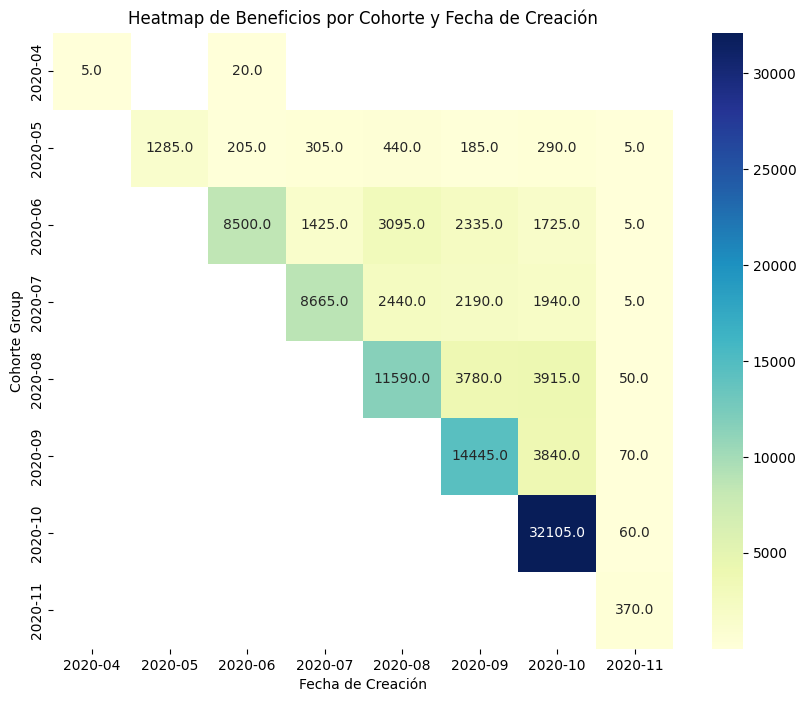

In [168]:
#With the pivot table made in the step before, we created a heatmap to better visualize the evolution of values
plt.figure(figsize=(10, 8))


heatmap = sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='')


heatmap.set_xlabel('Fecha de Creación')
heatmap.set_ylabel('Cohorte Group')
heatmap.set_title('Heatmap de Beneficios por Cohorte y Fecha de Creación')

plt.show()

As we can see in the heatmap, the cohort group which have a the highest benefit is the ones their accounts were created in 2020-10. But this heatmap is not the one that we want because we don't consider the fee status. In the next step we are going to take into account the fee status, choosing the ones who has an accepted status, which means that the fee is charged.

In [169]:
#The analysis befores was made without considering fees status. In our analysis of the lexique and checking both of the csv, we consider that a correct fee is when the status is accepted
df_accepted_fees = df_analysis[df_analysis['status_fee'] == 'accepted']
df_accepted_fees

,id_cash,created_at_cash,amount,total_amount,money_back_date,paid_at,status_cash,status_fee,from_date,user_id,cohort group,benefits
0,23534,2020-10,25.0,5.0,2020-11-06 07:16:21.845479+00,2020-11-06 07:16:22.014422+00,money_back,accepted,NaN,21465.0,2020-10,5.0
1,2203,2020-05,100.0,5.0,2020-07-15 22:00:00+00,NaN,money_back,accepted,2020-06-15 02:26:27+00,2109.0,2020-05,5.0
13,20639,2020-10,50.0,5.0,2020-10-31 18:58:22.24451+00,2020-10-17 05:30:46.780335+00,money_back,accepted,2020-10-27 17:05:21.138+00,30317.0,2020-07,5.0
14,20639,2020-10,50.0,5.0,2020-10-31 18:58:22.24451+00,2020-10-31 18:58:22.280263+00,money_back,accepted,NaN,30317.0,2020-07,5.0
16,2211,2020-05,100.0,5.0,2020-08-02 22:00:00+00,2020-06-28 15:40:27.730873+00,money_back,accepted,2020-07-01 22:00:00+00,3045.0,2020-05,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,2020-10,100.0,5.0,2021-02-05 12:19:30.626289+00,2021-02-05 12:19:30.685779+00,money_back,accepted,NaN,82122.0,2020-10,5.0
21053,20256,2020-10,100.0,5.0,2021-02-05 13:14:19.689906+00,2020-10-30 17:08:21.416796+00,money_back,accepted,2020-11-06 11:00:00+00,64517.0,2020-10,5.0
21054,20256,2020-10,100.0,5.0,2021-02-05 13:14:19.689906+00,2021-02-05 13:14:19.731397+00,money_back,accepted,NaN,64517.0,2020-10,5.0
21055,19886,2020-10,100.0,5.0,NaN,2020-10-10 21:22:04.456828+00,direct_debit_sent,accepted,2020-11-06 22:00:00+00,44867.0,2020-10,5.0


In [170]:
#We make the same group_by as the analysis before.
df_benefits_fees = df_accepted_fees.groupby(['cohort group','created_at_cash'])['benefits'].sum().reset_index()
sum_benefits = df_benefits_fees['benefits'].sum()
print(sum_benefits)
#And we create our pivo table
pivot = df_benefits_fees.pivot(index='cohort group', columns='created_at_cash', values='benefits')
pivot

74210.0


created_at_cash,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort group,,,,,,,
2020-05,520.0,115.0,180.0,270.0,155.0,220.0,5.0
2020-06,NaN,4570.0,680.0,1955.0,1625.0,1360.0,5.0
2020-07,NaN,NaN,4305.0,1590.0,1715.0,1545.0,NaN
2020-08,NaN,NaN,NaN,7885.0,3140.0,3295.0,50.0
2020-09,NaN,NaN,NaN,NaN,10150.0,3110.0,55.0
2020-10,NaN,NaN,NaN,NaN,NaN,25310.0,50.0
2020-11,NaN,NaN,NaN,NaN,NaN,NaN,350.0


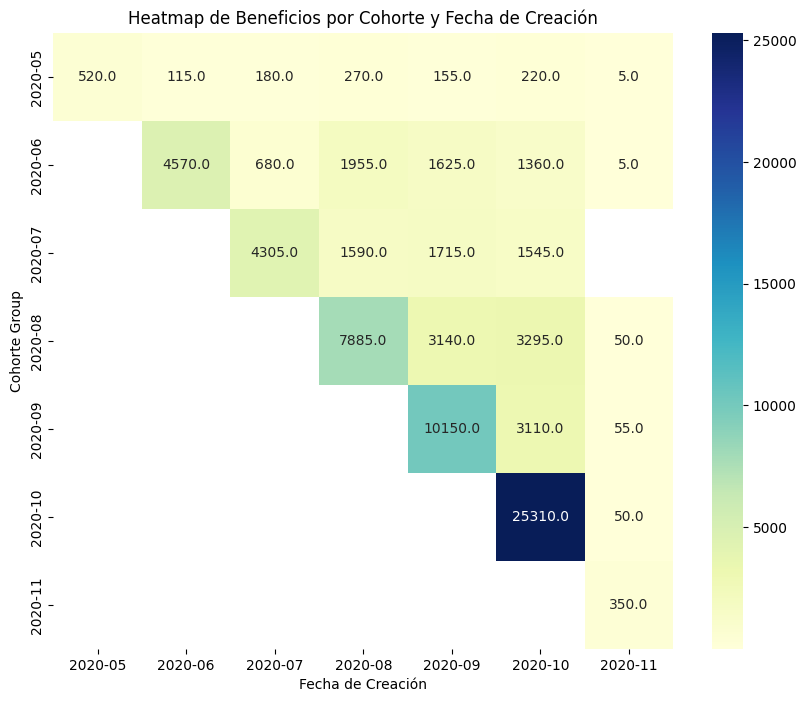

In [171]:


plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='')


heatmap.set_xlabel('Fecha de Creación')
heatmap.set_ylabel('Cohorte Group')
heatmap.set_title('Heatmap de Beneficios por Cohorte y Fecha de Creación')


plt.show()

Adding this status, our cohort group is reduce and it starts in 2020-05, but the pattern is the same, october 2020 is still being the month where the benefits are higher. In the next steps we are going to be focus also in the cash status, where we filter when the status_cash is also money_back, because this will be the real benefits of the company, because if we don't consider if the user has paid the cash_request, we are not going to talk about real benefits

In [172]:
df_accepted_fees_cash = df_analysis[(df_analysis['status_cash'] == 'money_back') & (df_analysis['status_fee'] == 'accepted')]

In [173]:
df_benefits_fees_cash = df_accepted_fees_cash.groupby(['cohort group','created_at_cash'])['benefits'].sum().reset_index()
sum_benefits = df_benefits_fees_cash['benefits'].sum()
print(sum_benefits)
pivot = df_benefits_fees_cash.pivot(index='cohort group', columns='created_at_cash', values='benefits')
pivot

72350.0


created_at_cash,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort group,,,,,,,
2020-05,510.0,100.0,175.0,265.0,145.0,215.0,5.0
2020-06,NaN,4250.0,635.0,1910.0,1580.0,1330.0,5.0
2020-07,NaN,NaN,3965.0,1535.0,1680.0,1535.0,NaN
2020-08,NaN,NaN,NaN,7695.0,3090.0,3280.0,50.0
2020-09,NaN,NaN,NaN,NaN,9905.0,3095.0,55.0
2020-10,NaN,NaN,NaN,NaN,NaN,24945.0,50.0
2020-11,NaN,NaN,NaN,NaN,NaN,NaN,345.0


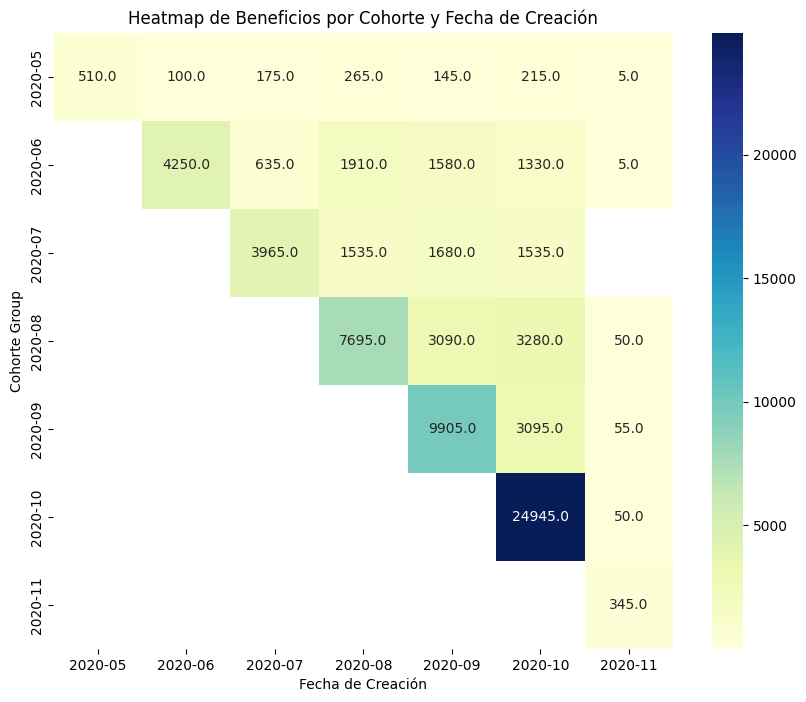

In [174]:

# Rellenar los valores faltantes en la pivot table
plt.figure(figsize=(10, 8))

# Crear el heatmap
heatmap = sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='')

# Añadir etiquetas y título
heatmap.set_xlabel('Fecha de Creación')
heatmap.set_ylabel('Cohorte Group')
heatmap.set_title('Heatmap de Beneficios por Cohorte y Fecha de Creación')

# Mostrar el heatmap
plt.show()

The real benefits of the company are 72350 euros (we consider euros as our currency).

The next steps are only to check how much loss the company has with the datasets provided. We consider as loss, when the cash_request is sent to the user but it is not reimbursed.

In [175]:
cash_no_money_back = cash[(cash['status'] == 'active') | (cash['status'] == 'money_sent')]
dinero_sin_devolver = cash_no_money_back['amount'].sum()
print(f"CR loss --> {dinero_sin_devolver} euros")
cash_no_money_back

CR loss --> 5105.0 euros


,Unnamed: 0,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
141,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,2020-07-03,NaN,regular,NaN,pending,2020-08-11 22:27:55.367849+00:00,2020-08-11 22:27:58.255621+00:00
491,491,6744,100.0,active,2020-07-06 09:44:52.345573+00:00,2020-08-11 22:28:04.436114+00,19722.0,2020-07-06 15:33:19.854894+00,NaN,2020-08-04 22:00:00+00:00,2020-07-08,NaN,regular,NaN,pending,2020-08-11 22:28:01.362552+00:00,2020-08-11 22:28:04.451911+00:00
1626,1626,1897,100.0,active,2020-05-16 04:07:34.397458+00:00,2020-08-11 22:38:29.672977+00,2564.0,2020-05-16 15:33:58.946955+00,NaN,2020-06-07 22:00:00+00:00,2020-05-18,2020-06-11 22:37:13.182826+00,regular,NaN,pending,2020-06-12 22:21:16.921972+00:00,2020-08-11 22:38:29.688614+00:00
3414,3414,6968,100.0,active,2020-07-07 18:10:03.257729+00:00,2020-08-08 22:11:20.869584+00,18693.0,2020-07-08 13:41:33.720189+00,NaN,2020-08-06 18:10:16.865000+00:00,2020-07-10,2020-08-06 22:00:00+00,regular,NaN,pending,2020-08-08 22:11:18.471802+00:00,2020-08-08 22:11:20.882151+00:00
3688,3688,26751,100.0,active,2020-10-31 14:20:02.726225+00:00,2021-01-16 09:52:37.67136+00,97516.0,NaN,NaN,2021-03-06 23:00:00+00:00,2020-11-03,NaN,instant,2020-10-31 14:20:21.24517+00,NaN,NaN,NaN
4112,4112,8565,50.0,active,2020-07-16 21:17:46.140656+00:00,2020-08-21 22:41:39.369563+00,24138.0,2020-07-17 15:22:31.532619+00,NaN,2020-08-14 22:00:00+00:00,2020-07-21,NaN,regular,NaN,pending,2020-08-21 22:41:36.009113+00:00,2020-08-21 22:41:39.384930+00:00
4157,4157,8146,100.0,active,2020-07-15 11:40:33.946736+00:00,2020-08-11 23:00:48.627689+00,33777.0,2020-07-17 08:14:05.532408+00,NaN,2020-08-05 22:00:00+00:00,2020-07-18,2020-08-05 22:00:00+00,regular,NaN,pending,2020-08-11 23:00:45.920018+00:00,2020-08-11 23:00:48.642709+00:00
4211,4211,4564,100.0,active,2020-06-22 01:29:08.093562+00:00,2021-01-08 09:23:48.505706+00,20230.0,2020-06-22 17:25:06.423563+00,NaN,2020-10-06 22:00:00+00:00,2020-06-24,NaN,regular,NaN,pending,2020-10-14 22:21:39.727626+00:00,2021-01-08 09:23:48.514922+00:00
4789,4789,7691,100.0,active,2020-07-12 14:11:02.127556+00:00,2020-08-08 22:11:22.639105+00,29118.0,2020-07-12 16:12:02.714007+00,NaN,2020-08-06 22:00:00+00:00,2020-07-14,2020-08-06 22:00:00+00,regular,NaN,pending,2020-08-08 22:11:19.196335+00:00,2020-08-08 22:11:22.654887+00:00
4800,4800,7638,100.0,active,2020-07-11 17:49:24.527111+00:00,2020-08-16 22:13:47.053931+00,31476.0,2020-07-11 18:39:35.480089+00,NaN,2020-08-10 22:00:00+00:00,2020-07-14,2020-08-11 22:00:00+00,regular,NaN,pending,2020-08-16 22:13:44.949938+00:00,2020-08-18 10:06:22.665326+00:00


The loss is 5105 euros, but we are going to check if there is any fee on this cash request and if is charged. If it was any fee, we are going to substract in the loss result.

In [176]:
merged_no_money_back = pd.merge(cash_no_money_back, fees, left_on='id', right_on='cash_request_id', suffixes=('_cash','_fee'))
merged_no_money_back

,Unnamed: 0_cash,id_cash,amount,status_cash,created_at_cash,updated_at_cash,user_id,moderated_at,deleted_account_id,reimbursement_date,...,status_fee,category,total_amount,reason,created_at_fee,updated_at_fee,paid_at,from_date,to_date,charge_moment
0,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
1,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
2,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after
3,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-19 16:30:48.607923+00,2020-10-13 14:25:16.91377+00,NaN,2020-08-03 22:00:00+00,2020-09-03 16:30:45.837+00,after
4,141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00:00,...,cancelled,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00,2020-12-15 17:07:43.211171+00,NaN,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,23935,8665,50.0,active,2020-07-17 13:07:28.650302+00:00,2021-02-08 11:38:46.491891+00,27063.0,2020-07-17 13:33:24+00,NaN,2020-07-28 22:00:00+00:00,...,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-31 23:37:08.159507+00,2020-10-31 23:37:08.159529+00,NaN,NaN,NaN,after
151,23935,8665,50.0,active,2020-07-17 13:07:28.650302+00:00,2021-02-08 11:38:46.491891+00,27063.0,2020-07-17 13:33:24+00,NaN,2020-07-28 22:00:00+00:00,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-02 22:40:00.983354+00,2020-10-13 14:25:01.084284+00,NaN,NaN,NaN,after
152,23941,26737,100.0,active,2020-10-31 13:34:20.474357+00:00,2021-02-05 18:34:44.742715+00,34803.0,2020-10-31 14:59:51.682148+00,NaN,2020-12-30 23:00:00+00:00,...,rejected,NaN,5.0,Instant Payment Cash Request 26737,2020-10-31 14:59:52.841792+00,2020-10-31 14:59:52.841814+00,2021-01-06 05:01:48.983924+00,NaN,NaN,after
153,23947,26487,100.0,active,2020-10-30 17:56:21.177118+00:00,2021-02-05 19:14:39.908246+00,100040.0,NaN,NaN,2020-12-08 22:00:00+00:00,...,rejected,NaN,5.0,Instant Payment Cash Request 26487,2020-10-30 17:57:23.484369+00,2020-10-30 17:57:23.484391+00,2020-12-24 05:48:34.673004+00,NaN,NaN,after


In [177]:
tasas_devueltas = merged_no_money_back[merged_no_money_back['status_fee'] == 'accepted']['total_amount'].sum()
perdidas = dinero_sin_devolver - tasas_devueltas
print(f"Perdidas --> {perdidas}")

Perdidas --> 5005.0


We found some fees in this cash request and the loss reduce to 5005 euros.

As we can see in our final heatmap, october is the month with the highest benefit in the company but, is curious how all the cohort groups maintain the same profit number from the second year of the creation of your account, not counting the first, which is normally the month where the company receives the most profit. We will see in the other analysis that the benefits has a relation with the usage of the application and the incidents.